In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline

In [36]:
with open('train.tsv') as f:
    data = pd.read_csv(f, sep='\t')

In [37]:
data.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [38]:
pos_neg = data[(data['Sentiment'] == 0) | (data['Sentiment'] == 4)]

In [39]:
pos_neg['binary'] = pos_neg.apply(lambda x: 0 if x['Sentiment']== 0 else 1,axis=1)

/home/terragon/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [40]:
clf = MultinomialNB()
vectorizer = TfidfVectorizer()

In [42]:
vectorizer.fit(pos_neg.loc[:, 'Phrase'])
print('Vectorizer fit complete')

Vectorizer fit complete


In [43]:
X = vectorizer.transform(pos_neg.loc[:, 'Phrase'])
y = pos_neg.loc[:, 'binary']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [45]:
clf.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
def plot_roc(model, x_columns, y_true, size_x, size_y):
    y_pred = model.predict_proba(x_columns)

    fpr, tpr, threshold = roc_curve(y_true, y_pred[:, 1])
    area_under_curve = auc(fpr, tpr)

    fig, ax = plt.subplots(figsize=(size_x, size_y))
    plt.title('ROC CURVE')
    ax.plot(fpr, tpr, 'k', label='AUC = %0.3f' % area_under_curve)

    ax.legend(loc='lower right')
    ax.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    
    plt.show()

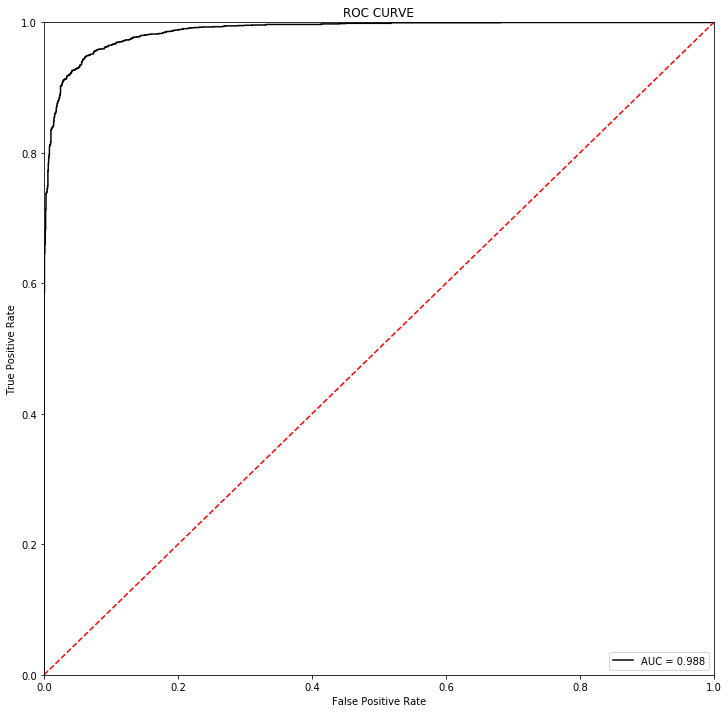

In [47]:
plot_roc(clf, X_test, y_test, size_x=12, size_y=12)

In [50]:
path='SentimentClassifier.pkl'
with open(path, 'wb') as f:
    pickle.dump(clf, f)
    print("Pickled classifier at {}".format(path))

Pickled classifier at SentimentClassifier.pkl


In [52]:
path2='TFIDFVectorizer.pkl'
with open(path2, 'wb') as f:
    pickle.dump(vectorizer, f)
    print("Pickled vectorizer at {}".format(path))

Pickled vectorizer at SentimentClassifier.pkl
